In [1]:
import sys
sys.path.append('..')
from Inference.script_utils import prepare_model
from csvflowdatamodule.CsvDataset import CsvDataModule
from torchvision.utils import flow_to_image

## Load Model

In [23]:
%%capture
base = '/net/serpico-fs2/emeunier/' # os.environ['Dataria'] 
model_dir = base+'/Models/SegGrOptFlow/'
model_name = 'fullmodel(15vl7in3)'#'zsxucgtk-patched'
model = prepare_model(f'{model_dir}/vir-tempo/{model_name}/').eval();

## Load Data

In [24]:
model.hparams['preload_cache'] = False
model.hparams['batch_size'] = 5
model.binary_method = 'optimax'
model.hparams["data_file"] = 'DAVIS_D16Split'
model.hparams["flow_augmentation"] = ''

data_path  = f'../DataSplit/{model.hparams["data_file"]}_'+'{}.csv'
dm = CsvDataModule(data_path =data_path, request=model.request, num_workers=0, shuffle_fit=True, **model.hparams)
dm.setup('fit')

dataloader = iter(dm.get_dataloader('val'))

num workers : 0
Flow Transformations : []
Flow Transformations : []
Flow Transformations : []
Loading data in : ../DataSplit/DAVIS_D16Split_{}.csv ------ Stage : fit
Boundaries : Strict
Filter index in request : {'Flow+1', 'Flow', 'Flow-1'}
request :  {'Flow+1', 'Flow', 'Flow-1'}
Boundaries : Strict
Filter index in request : {'Flow+1', 'Flow', 'Flow-1'}
request :  {'Flow+1', 'Flow', 'Flow-1'}
Size of dataset :
	Train : 1989 	 Val : 1316


In [25]:
batch = next(dataloader)

## Inference

In [26]:
batch, index_target = model.prediction(batch)

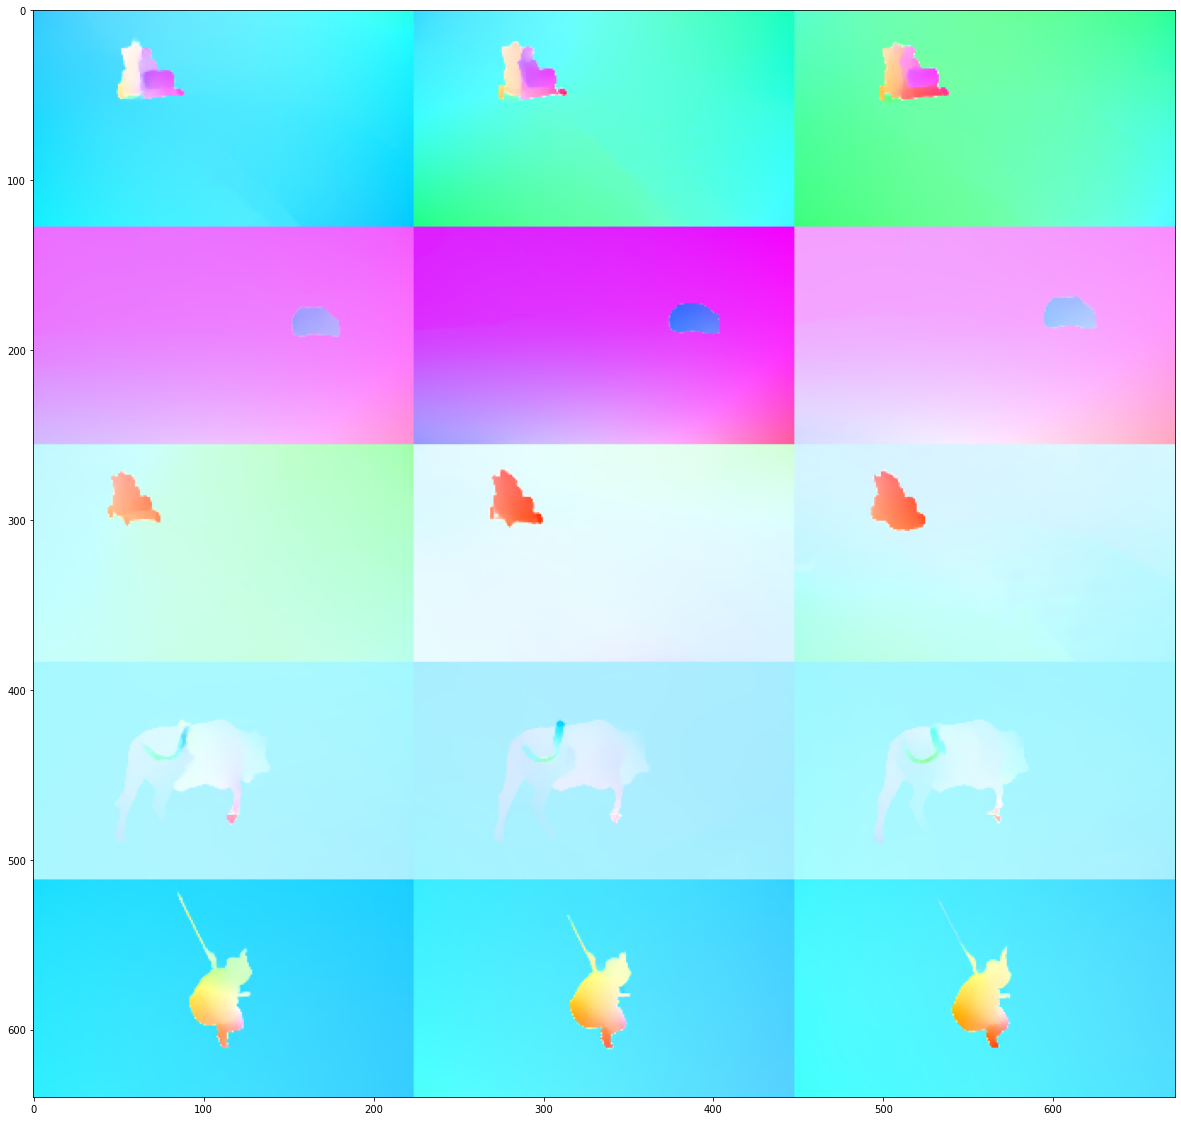

In [27]:
flow = einops.rearrange(batch['InputV'].cpu(), 'b c t h w -> b t c h w')
flowc = [flow_to_image(flow[i]) for i in range(len(flow))]
plt.figure(figsize=(30,20))
plt.imshow(einops.rearrange(flowc, 'b t c i j-> (b i) (t j) c', t=model.hparams['len_seq']))

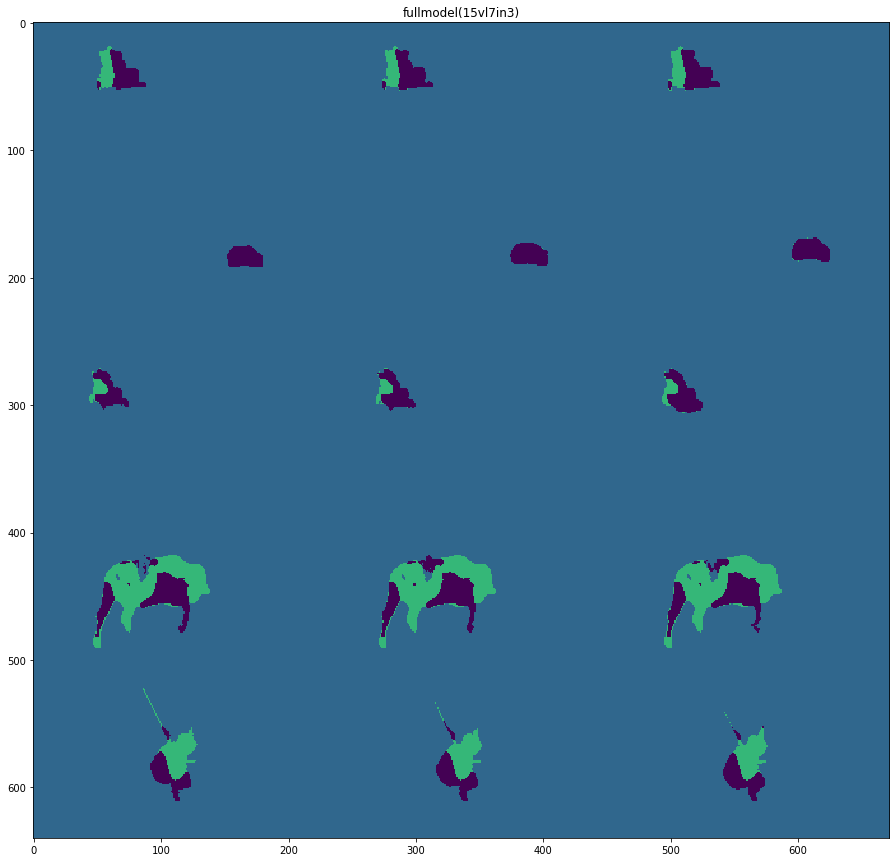

In [28]:
plt.figure(figsize=(30,15))
plt.title(f'{model_name}' )
plt.imshow(einops.rearrange(batch['PredV'].cpu(), 'b c t i j -> c (b i) (t j)').argmax(0).detach(),
           interpolation='none', vmax=3)
plt.show() 